# KAGGLE

https://www.kaggle.com/datasets/safaruzzamanshovo/graduate-admission-dataset

In [156]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("safaruzzamanshovo/graduate-admission-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\safaruzzamanshovo\graduate-admission-dataset\versions\1


# LIBRARY & LOAD MODEL

In [157]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [158]:
df = pd.read_csv("graduate_admission.csv")
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,295,96,2,4.9,1.7,2.93,0,0.612
1,340,119,3,4.1,1.7,3.76,0,0.708
2,336,96,1,3.2,1.8,3.12,1,0.728
3,337,108,4,3.4,1.3,2.11,0,0.643
4,323,98,1,1.1,1.3,3.40,0,0.524


# EDA & PREPOCESSING

In [159]:
# bersihkan kolom
df.columns = df.columns.str.strip()

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          1000 non-null   int64  
 1   TOEFL Score        1000 non-null   int64  
 2   University Rating  1000 non-null   int64  
 3   SOP                1000 non-null   float64
 4   LOR                1000 non-null   float64
 5   GPA                1000 non-null   float64
 6   Research           1000 non-null   int64  
 7   Chance of Admit    1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [161]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,315.840000,106.459000,3.053000,2.997000,3.014400,3.027160,0.517000,0.729223
std,15.083432,8.449954,1.421341,1.163239,1.163136,0.582774,0.499961,0.095161
min,290.000000,92.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.491000
25%,303.000000,99.000000,2.000000,2.000000,2.000000,2.530000,0.000000,0.655000
50%,316.000000,107.000000,3.000000,3.000000,3.000000,3.025000,1.000000,0.728500
75%,329.000000,114.000000,4.000000,4.000000,4.000000,3.550000,1.000000,0.801000
max,340.000000,120.000000,5.000000,5.000000,5.000000,4.000000,1.000000,0.970000


In [162]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
GPA                  0
Research             0
Chance of Admit      0
dtype: int64

In [163]:
duplicate = df[df.duplicated()]
duplicate

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit


# ASUMSI ANALISIS REGRESI

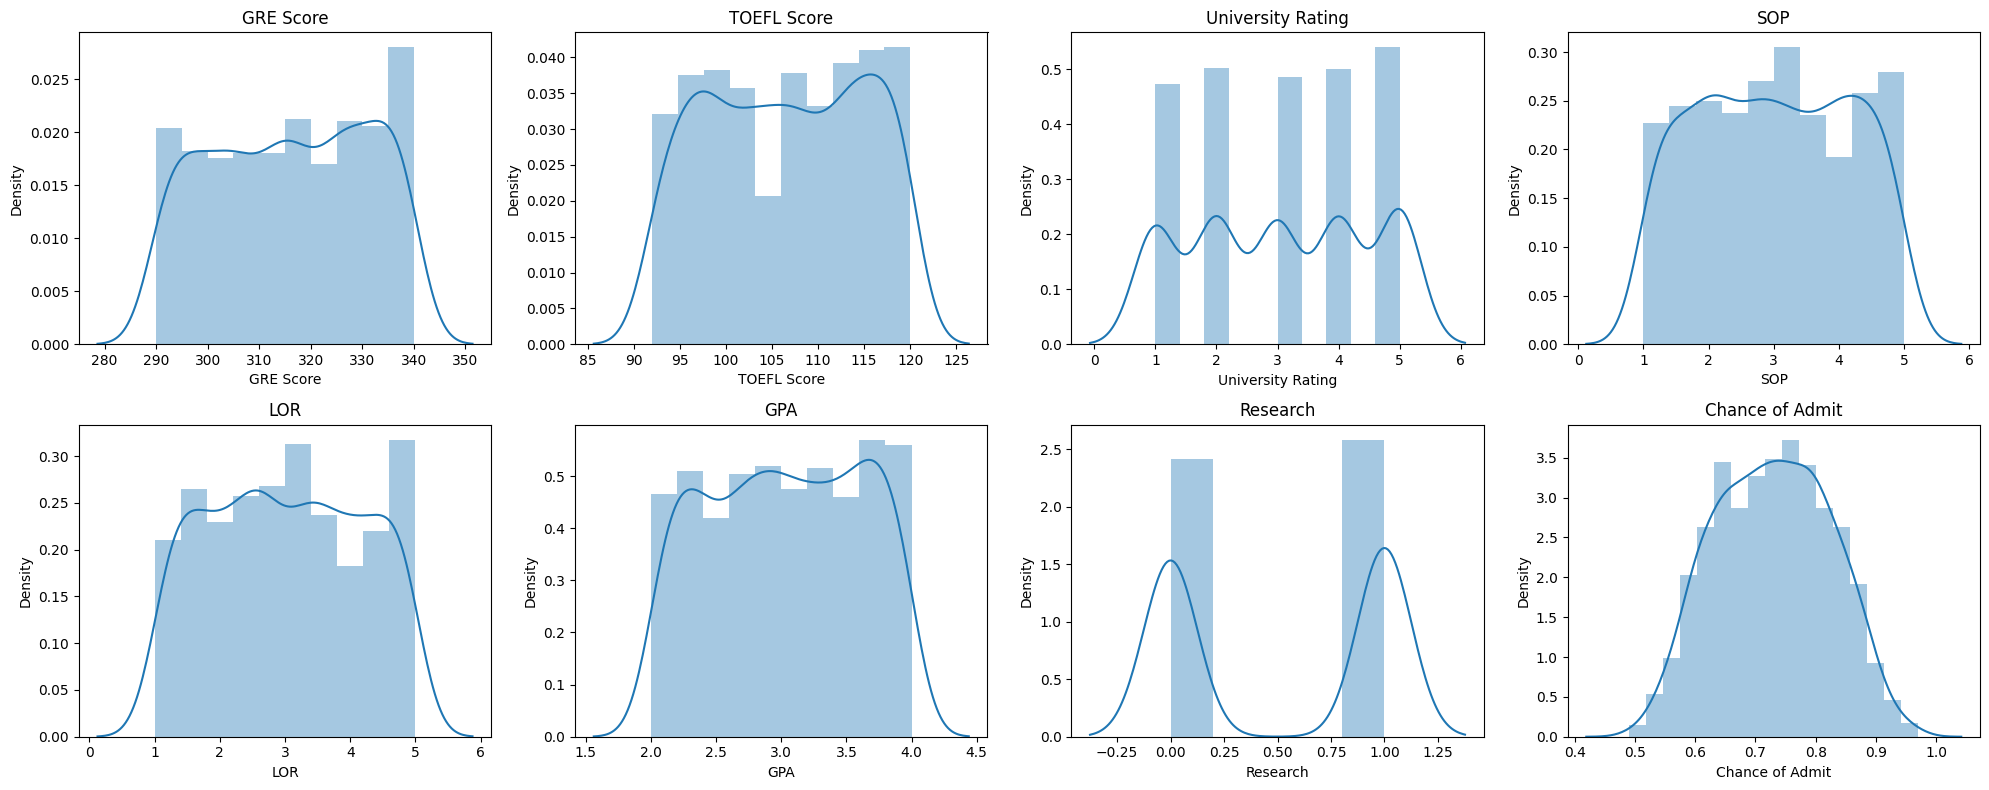

In [164]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["GRE Score","TOEFL Score","University Rating","SOP","LOR","GPA","Research","Chance of Admit"]
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.distplot(df[col], kde=True, ax=ax)
    ax.set_title(col)

# jika ada sisa axes tanpa data, hapus tampilannya
for ax in axes[len(cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

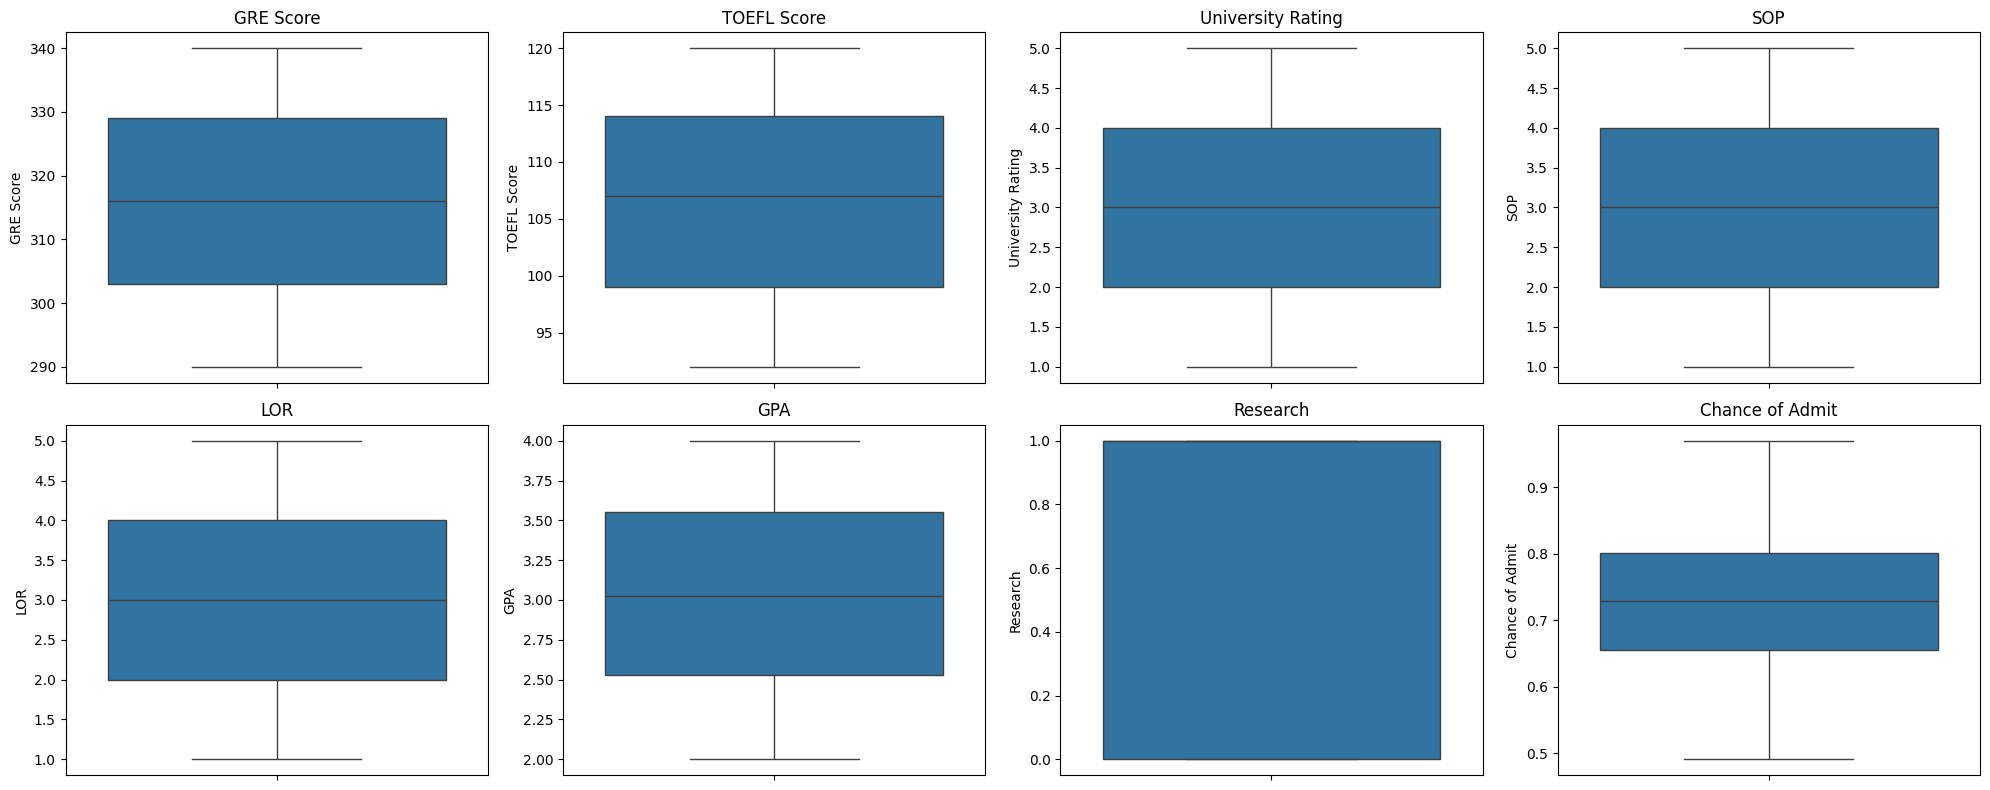

In [165]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["GRE Score","TOEFL Score","University Rating","SOP","LOR","GPA","Research","Chance of Admit"]
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col)

# jika ada sisa axes tanpa data, hapus tampilannya
for ax in axes[len(cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

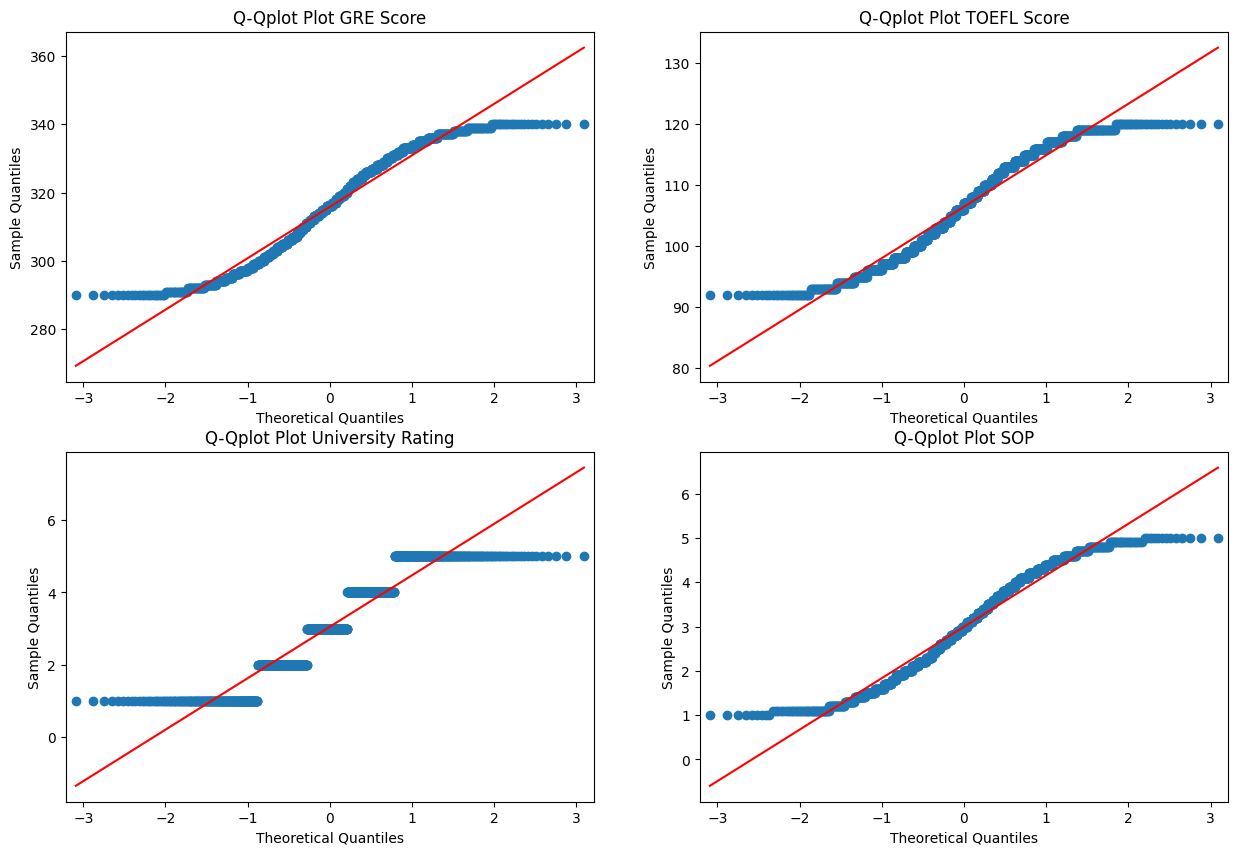

In [166]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sm.graphics.qqplot(df["GRE Score"].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot GRE Score')

sm.graphics.qqplot(df["TOEFL Score"].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot TOEFL Score')

sm.graphics.qqplot(df["University Rating"].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot University Rating')

sm.graphics.qqplot(df["SOP"].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot SOP')

plt.show()

In [167]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = df.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.948, p=0.000
Tolak H0, GRE Score tidak berdistribusi normal
Statistics=0.947, p=0.000
Tolak H0, TOEFL Score tidak berdistribusi normal
Statistics=0.886, p=0.000
Tolak H0, University Rating tidak berdistribusi normal
Statistics=0.954, p=0.000
Tolak H0, SOP tidak berdistribusi normal
Statistics=0.954, p=0.000
Tolak H0, LOR tidak berdistribusi normal
Statistics=0.952, p=0.000
Tolak H0, GPA tidak berdistribusi normal
Statistics=0.636, p=0.000
Tolak H0, Research tidak berdistribusi normal
Statistics=0.989, p=0.000
Tolak H0, Chance of Admit tidak berdistribusi normal


<Axes: >

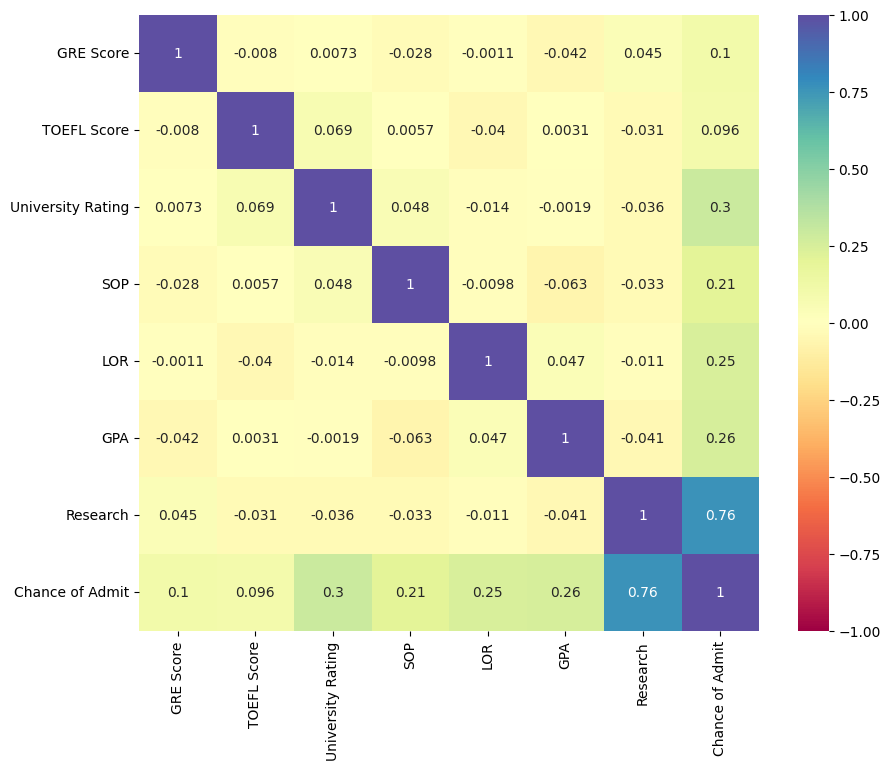

In [168]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [169]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Chance of Admit"].sort_values()
korelasi

TOEFL Score          0.095582
GRE Score            0.103643
SOP                  0.206102
LOR                  0.246334
GPA                  0.256385
University Rating    0.295981
Research             0.760349
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

# STANDARDIZATION

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'GPA', 'Research']
target = 'Chance of Admit'

X = df[features]
y = df[target]

print(f"Bentuk X (fitur): {X.shape}")
print(f"Bentuk y (target): {y.shape}")

Bentuk X (fitur): (1000, 7)
Bentuk y (target): (1000,)


In [171]:
# Scale data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-1.3823398 , -1.23837758, -0.74122019, ..., -0.16680328,
        -1.03459817, -1.23245785],
       [ 1.602559  ,  1.48489274, -0.03730738, ...,  1.25813209,
        -1.03459817, -0.22313414],
       [ 1.33723466, -1.23837758, -1.44513299, ...,  0.15938675,
         0.96655883, -0.01285836],
       ...,
       [ 1.40356574, -0.054347  , -1.44513299, ..., -0.40715382,
        -1.03459817, -1.53735772],
       [-0.65269787, -0.17275006, -0.74122019, ..., -0.04662801,
        -1.03459817, -1.50581636],
       [-0.65269787, -1.47518369, -0.74122019, ...,  1.1894605 ,
         0.96655883,  0.26050014]], shape=(1000, 8))

In [172]:
# Membuat dataframe dari hasil scalling
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,-1.382340,-1.238378,-0.741220,1.636768,-1.130614,-0.166803,-1.034598,-1.232458
1,1.602559,1.484893,-0.037307,0.948689,-1.130614,1.258132,-1.034598,-0.223134
2,1.337235,-1.238378,-1.445133,0.174600,-1.044596,0.159387,0.966559,-0.012858
3,1.403566,0.182459,0.666605,0.346620,-1.474684,-1.574571,-1.034598,-0.906530
4,0.474931,-1.001571,-1.445133,-1.631608,-1.474684,0.640088,-1.034598,-2.157671
...,...,...,...,...,...,...,...,...
995,-0.719029,1.603296,1.370518,1.206719,-0.872561,-0.046628,0.966559,1.953220
996,-1.515002,0.537668,-0.741220,-0.255449,-1.130614,-0.802015,0.966559,0.323583
997,1.403566,-0.054347,-1.445133,1.120709,-0.442474,-0.407154,-1.034598,-1.537358
998,-0.652698,-0.172750,-0.741220,-0.857519,0.933806,-0.046628,-1.034598,-1.505816


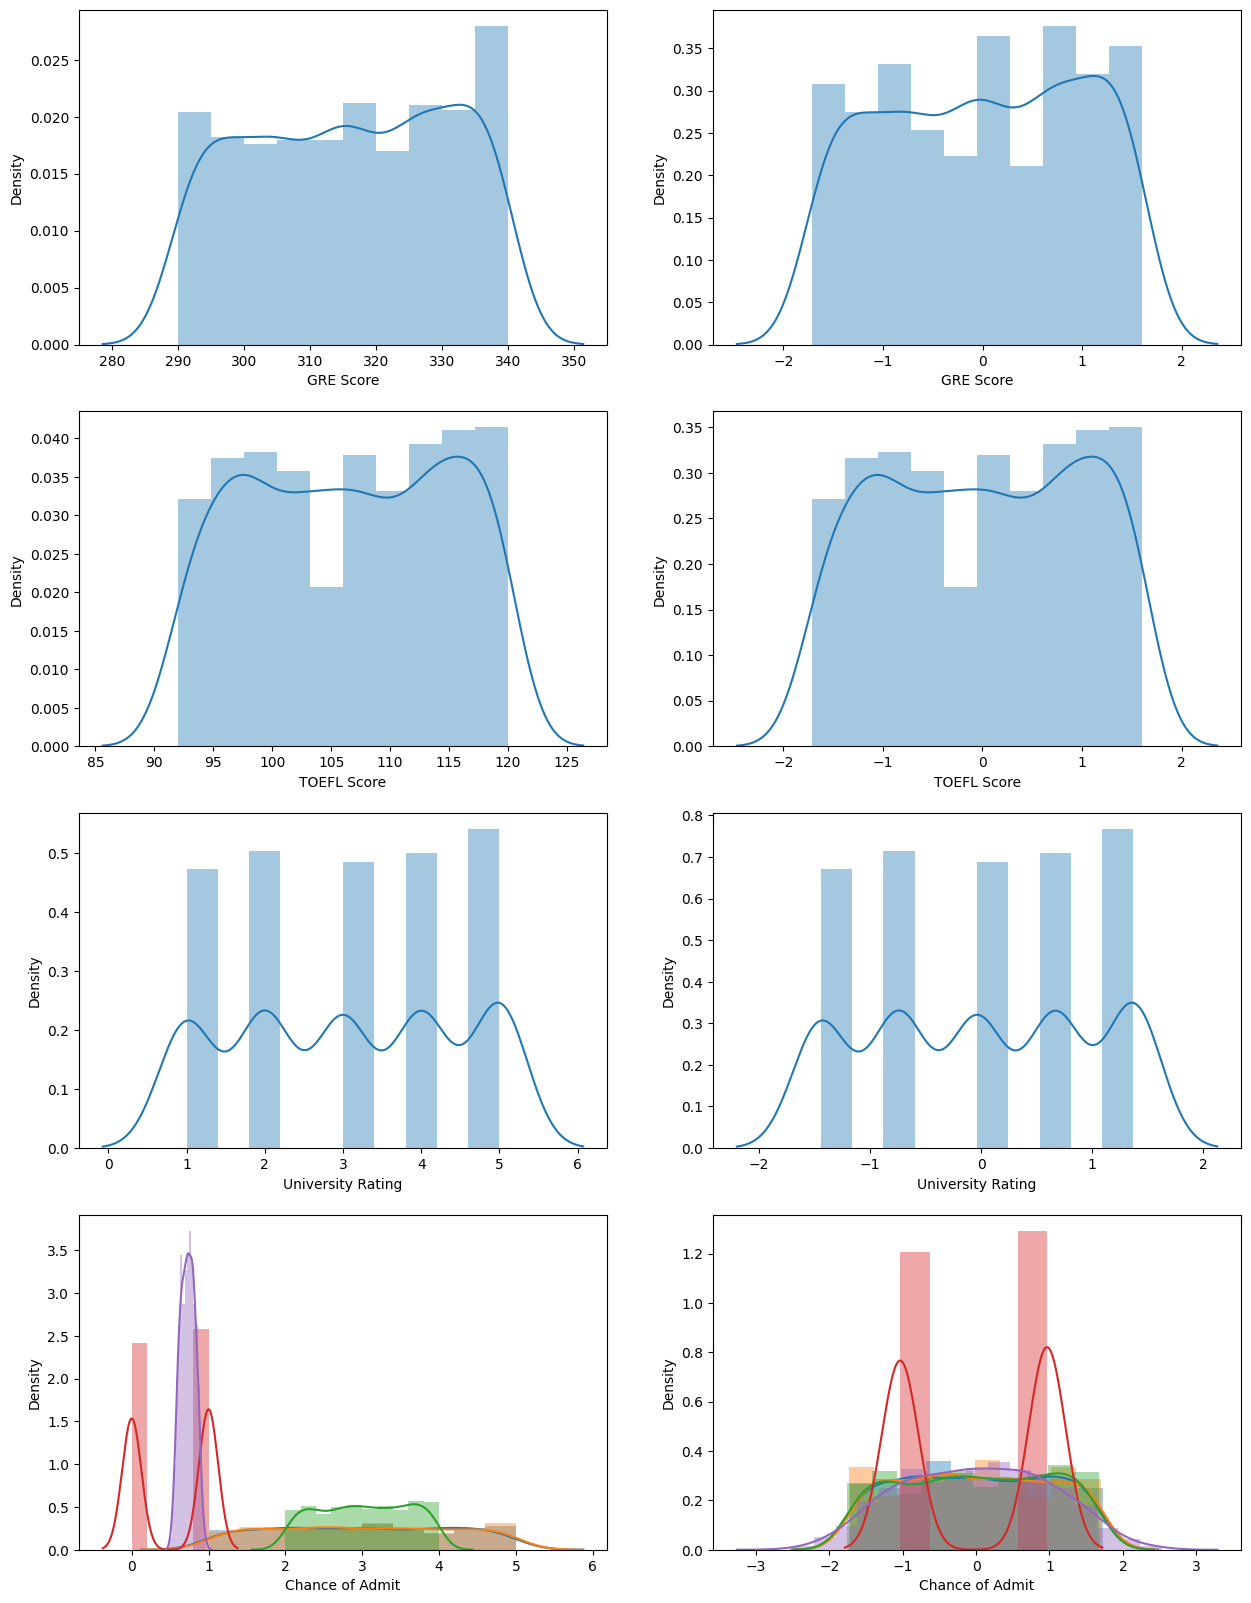

In [173]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

sns.distplot(df["GRE Score"], ax=axes[0, 0])
sns.distplot(scaled_df["GRE Score"], ax=axes[0, 1])

sns.distplot(df["TOEFL Score"], ax=axes[1, 0])
sns.distplot(scaled_df["TOEFL Score"], ax=axes[1, 1])

sns.distplot(df["University Rating"], ax=axes[2, 0])
sns.distplot(scaled_df["University Rating"], ax=axes[2, 1])

sns.distplot(df["SOP"], ax=axes[3, 0])
sns.distplot(scaled_df["SOP"], ax=axes[3, 1])

sns.distplot(df["LOR"], ax=axes[3, 0])
sns.distplot(scaled_df["LOR"], ax=axes[3, 1])

sns.distplot(df["GPA"], ax=axes[3, 0])
sns.distplot(scaled_df["GPA"], ax=axes[3, 1])

sns.distplot(df["Research"], ax=axes[3, 0])
sns.distplot(scaled_df["Research"], ax=axes[3, 1])

sns.distplot(df["Chance of Admit"], ax=axes[3, 0])
sns.distplot(scaled_df["Chance of Admit"], ax=axes[3, 1])
plt.show()

In [174]:
X_scaled = scaled_df.drop("Chance of Admit", axis=1).values
y_original = df["Chance of Admit"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_original, test_size=0.3, random_state=0)

In [175]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  700
Ukuran X test  300
Ukuran y train  700
Ukuran y test  300


In [176]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [177]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [178]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     930.5
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:03:45   Log-Likelihood:                 1475.1
No. Observations:                 700   AIC:                            -2934.
Df Residuals:                     692   BIC:                            -2898.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7308      0.001    652.949      0.0



### 1. Signifikansi Variabel (Analisis `P>|t|`)

* **Variabel Independen (`x1` s/d `x7`):** Nilai `P>|t|` untuk **ketujuh variabel independen** Anda (`x1`, `x2`, `x3`, `x4`, `x5`, `x6`, dan `x7`) adalah **0.000**.
* **Kesimpulan:** Karena semua nilai ini < 0.05, artinya **ketujuh variabel independen** tersebut memberikan pengaruh yang **signifikan secara statistik** terhadap variabel dependen (`y`).

* **Intercept (`const`):** Nilai `P>|t|` untuk `const` (konstanta/intercept) adalah **0.925**.
* **Kesimpulan:** Karena 0.925 > 0.05, ini berarti intercept **tidak berpengaruh signifikan** terhadap model. Seperti yang Anda catat, ini menunjukkan bahwa garis regresi melewati titik pusat (0,0), yang merupakan hasil yang wajar dan diharapkan karena kita telah melakukan *Standard Scaling* pada data (data berpusat di 0).

### 2. Besar Pengaruh (Analisis `coef`)

> **Catatan Penting:** Karena data ini telah di-scaling (dibakukan menggunakan StandardScaler), interpretasi "bertambah satu" berarti "bertambah satu **standar deviasi**", bukan satu unit asli (seperti 1 poin GRE).

* **Nilai `coef` - `x1`**: **0.0006**
    * Artinya: Jika nilai `x1` bertambah *satu standar deviasi* (sementara variabel lain konstan), maka nilai `y` (variabel dependen) diprediksi bertambah **0.0006** poin.
* **Nilai `coef` - `x2`**: **0.0012**
    * Artinya: Jika nilai `x2` bertambah *satu standar deviasi*, maka nilai `y` diprediksi bertambah **0.0012** poin.
* **Nilai `coef` - `x3`**: **0.0205**
    * Artinya: Jika nilai `x3` bertambah *satu standar deviasi*, maka nilai `y` diprediksi bertambah **0.0205** poin.
* **Nilai `coef` - `x4`**: **0.0195**
    * Artinya: Jika nilai `x4` bertambah *satu standar deviasi*, maka nilai `y` diprediksi bertambah **0.0195** poin.
* **Nilai `coef` - `x5`**: **0.0213**
    * Artinya: Jika nilai `x5` bertambah *satu standar deviasi*, maka nilai `y` diprediksi bertambah **0.0213** poin.
* **Nilai `coef` - `x6`**: **0.0493**
    * Artinya: Jika nilai `x6` bertambah *satu standar deviasi*, maka nilai `y` diprediksi bertambah **0.0493** poin.
* **Nilai `coef` - `x7`**: **0.1493**
    * Artinya: Jika nilai `x7` bertambah *satu standar deviasi*, maka nilai `y` diprediksi bertambah **0.1493** poin. (Ini adalah fitur dengan pengaruh paling besar dalam model Anda).

### 3. Kecocokan Model (Analisis `R-squared`)

* **Nilai `R-squared`**: **0.904**
* **Artinya:** Variabel dependen (`y`, kemungkinan `Chance of Admit`) dapat dijelaskan oleh **ketujuh variabel independen** yang ada di dalam model sebesar **90.4%**. Sisanya (sekitar 9.6%) dijelaskan oleh faktor-faktor lain di luar model ini.
* **Kesimpulan:** Ini adalah nilai yang sangat tinggi dan menunjukkan model Anda sangat baik (*strong fit*) dalam menjelaskan data.

### 4. Kriteria Pemilihan Model (Analisis `AIC` & `BIC`)

* **Nilai `AIC`** (Akaike Information Criterion): **-2934.**
* **Nilai `BIC`** (Bayesian Information Criterion): **-2898.**
* **Artinya:** Seperti yang Anda tulis, nilai ini digunakan untuk membandingkan beberapa model yang berbeda. Model yang dianggap terbaik adalah model yang memiliki nilai `AIC` dan `BIC` **terkecil**. Anda akan menggunakan angka ini sebagai acuan jika Anda mencoba model lain (misalnya, dengan mengurangi atau menambah fitur).

In [179]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.9039582523459792
adjusted coefficient of determination: 0.9029867317772247
regression coefficients: [0.73083991 0.00906553 0.01046871 0.02912034 0.02268811 0.0247513
 0.02871503 0.07462202]


In [180]:
# membuat list
list_columns = []

for i in df.columns:
  if i != "Chance of Admit":
    list_columns.append(i)

In [181]:
list_columns

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'GPA',
 'Research']

In [182]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_admit"] = y_test
df_statsmod["prediction_admit"] = prediction_1
df_statsmod.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,actual_admit,prediction_admit
0,-1.316009,-0.054347,-0.037307,1.206719,-0.786544,1.481315,0.966559,0.861,0.839827
1,0.607593,-1.475184,1.370518,0.690659,-1.302649,-1.214045,0.966559,0.793,0.781507
2,1.536228,-1.711990,-0.741220,0.518640,1.363893,1.395475,0.966559,0.863,0.862982
3,-0.785360,-0.172750,1.370518,1.722778,0.675753,1.498483,0.966559,0.893,0.932790
4,-0.520036,1.129684,1.370518,0.174600,0.331683,0.434073,-1.034598,0.709,0.725293


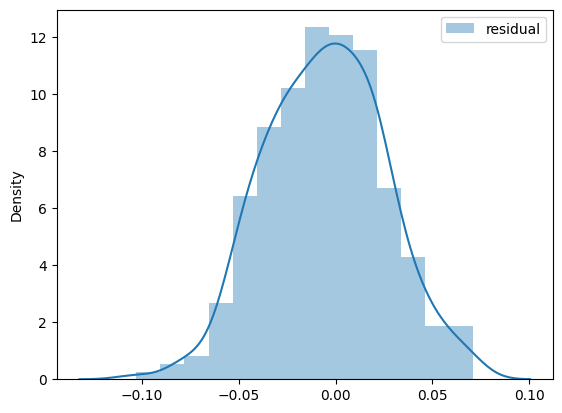

In [183]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_admit'] - df_statsmod['prediction_admit']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [184]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.996, p=0.740
Gagal Tolak H0, residual berdistribusi normal


In [185]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,actual_admit,prediction_admit,residual
0,-1.316009,-0.054347,-0.037307,1.206719,-0.786544,1.481315,0.966559,0.861,0.839827,0.021173
1,0.607593,-1.475184,1.370518,0.690659,-1.302649,-1.214045,0.966559,0.793,0.781507,0.011493
2,1.536228,-1.711990,-0.741220,0.518640,1.363893,1.395475,0.966559,0.863,0.862982,0.000018
3,-0.785360,-0.172750,1.370518,1.722778,0.675753,1.498483,0.966559,0.893,0.932790,-0.039790
4,-0.520036,1.129684,1.370518,0.174600,0.331683,0.434073,-1.034598,0.709,0.725293,-0.016293


<function matplotlib.pyplot.show(close=None, block=None)>

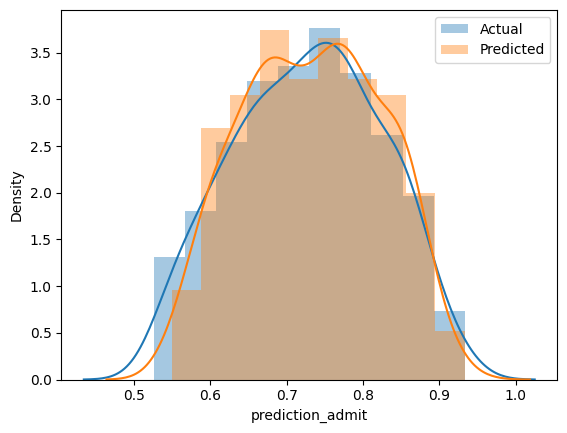

In [186]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_admit'], label="Actual")
sns.distplot(df_statsmod['prediction_admit'], label="Predicted")
plt.legend()
plt.show

# ASUMSI AUTOKORELASI

In [187]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

np.float64(1.9461741269064832)

# Uji Homoskedasitas

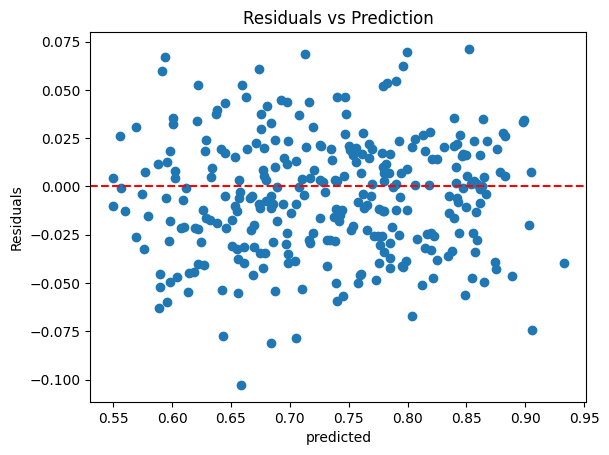

In [188]:
asm_homosk = plt.scatter(df_statsmod['prediction_admit'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = plt.axhline(y=0, color='red', linestyle='--') 
asm_homosk = plt.title('Residuals vs Prediction')
plt.show()

HASIL = BAGUS

1. Hasil: Homoskedastisitas (Terpenuhi)

Plot ini **terlihat ideal** karena memenuhi asumsi **homoskedastisitas**. Ini berarti varians (sebaran) dari *error* (residual) Anda konstan di semua tingkat nilai prediksi.

2. Alasan

* **Penyebaran Acak:** Titik-titik data (residual) Anda tersebar secara **acak** di sekitar garis merah horizontal (y=0).
* **Tidak Ada Pola:** Yang terpenting, Anda **tidak melihat** adanya pola yang jelas, seperti:
    * **Bentuk Corong/Terompet:** Plot Anda tidak melebar atau menyempit secara sistematis dari kiri ke kanan. Ini menunjukkan variansnya konsisten.
    * **Bentuk Melengkung (U-shape):** Titik-titik tidak membentuk kurva, yang menunjukkan bahwa model linear Anda sudah tepat.

# EVALUATION MODEL

In [189]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_admit'], df_statsmod['prediction_admit']))

R-square : 0.8945791772929224


In [190]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_admit'], df_statsmod['prediction_admit']))

MSE : 0.0009621684272215788


## Uji Partial Analisis Regresi
**Uji Parameter T-test** memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [191]:
t_const, t_x1, t_x2, t_x3, t_x4, t_x5, t_x6, t_x7 = results.tvalues
print(f"T-test score const: {t_const}")
print(f"T-test score x1 (GRE): {t_x1}")
print(f"T-test score x2 (TOEFL Score): {t_x2}")
print(f"T-test score x3 (University Rating): {t_x3}")
print(f"T-test score x4 (SOP): {t_x4}")
print(f"T-test score x5 (LOR): {t_x5}")
print(f"T-test score x6 (GPA): {t_x6}")
print(f"T-test score x7 (Research): {t_x7}")

T-test score const: 652.9489763810644
T-test score x1 (GRE): 7.954682323756152
T-test score x2 (TOEFL Score): 9.36455004083654
T-test score x3 (University Rating): 25.63300179515744
T-test score x4 (SOP): 20.577343171915373
T-test score x5 (LOR): 22.339214130572973
T-test score x6 (GPA): 25.085027478607852
T-test score x7 (Research): 66.39722094360114


In [192]:
p_const, p_x1, p_x2, p_x3, p_x4, p_x5, p_x6, p_x7 = results.pvalues
print(f"P-value const: {p_const}")
print(f"P-value x1 (GRE): {p_x1}")
print(f"P-value x2 (TOEFL Score): {p_x2}")
print(f"P-value x3 (University Rating): {p_x3}")
print(f"P-value x4 (SOP): {p_x4}")
print(f"P-value x5 (LOR): {p_x5}")
print(f"P-value x5 (GPA): {p_x6}")
print(f"P-value x7 (Research): {p_x7}")

P-value const: 0.0
P-value x1 (GRE): 7.336947310199076e-15
P-value x2 (TOEFL Score): 1.0524091134539603e-19
P-value x3 (University Rating): 2.109627963028378e-102
P-value x4 (SOP): 8.976508135111987e-74
P-value x5 (LOR): 1.1909486335781722e-83
P-value x5 (GPA): 2.8644685145226157e-99
P-value x7 (Research): 2.2558456835254171e-302


In [193]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  930.4571425644856
P-value :  0.0
Tolak H0
